In [11]:
from selenium import webdriver
from time import sleep
import urllib
import os
import requests
import shutil
import cv2
from PIL import Image
import numpy
from matplotlib import pyplot as plt
from keras.models import load_model


In [2]:

#使用chrome的webdriver
#driver = webdriver.Firefox()
driver = webdriver.Chrome()
#開啟google首頁
driver.get('https://icinfo.immigration.gov.tw/NIL_WEB/NFCData.aspx')


In [3]:
classifier = load_model('captchabreak.hd5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
img = driver.find_element_by_id("Image2")
#img.location
#img.size

In [6]:
left = img.location['x']
right = img.location['x'] + img.size['width']
top = img.location['y'] 
bottom = img.location['y'] + img.size['height']
print (left , right, top , bottom )

741 803 132 154


In [7]:
driver.save_screenshot("screenshot.png")


True

In [8]:
img2 = Image.open('screenshot.png')

In [9]:
img3 = img2.crop((left , top ,right, bottom) )
img3

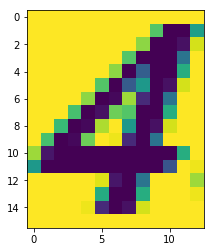

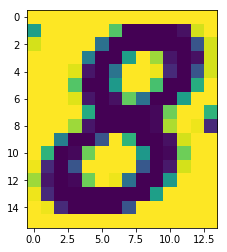

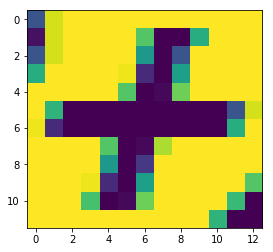

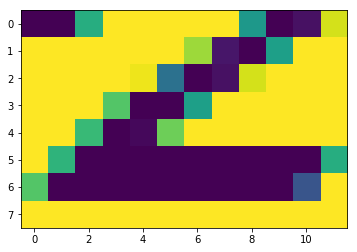

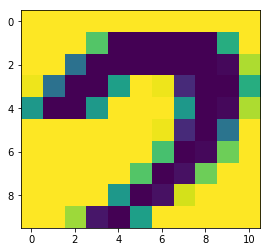

In [12]:
pil_image = img3.convert('L')
open_cv_image = numpy.array(pil_image)
ret, thresh = cv2.threshold(open_cv_image, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])
ary = []
for (c,_) in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    #print(x,y,w,h)
    if y>0 and w >= 6 and w <= 50 and h >= 5:
         ary.append((x,y,w,h) )
data = []
for idx, (x,y,w,h) in enumerate(ary):
    fig = plt.figure()
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig(os.path.join('predict/', '{}_{}.jpg'.format(1,idx)), dpi=100)

        

In [18]:
from keras.preprocessing import image
import numpy as np
number=[]
for f in os.listdir('predict'):
    fig = plt.figure()
    test_image = image.load_img('predict/'+f, target_size= (60,40))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    number.append(classifier.predict_classes(test_image)[0])
    print(f, classifier.predict_classes(test_image))
    os.remove('predict/'+f)
    #plt.imshow(img)

1_0.jpg [4]
1_1.jpg [8]
1_2.jpg [0]
1_3.jpg [2]
1_4.jpg [2]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [14]:
ans = number[0]*10 + number[1] + number[3]
ans

50

In [16]:
element2 = driver.find_element_by_id("TextBox1")
element2.send_keys('{}'.format(ans))
element2.submit()